In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

위 3개는 디폴트이다.

부스팅계열은 성능은 좋은데, 오버피팅이 잘 일어나는 문제점이 있다. xgboost는 요새 가장 핫하다. <br>
xgboost는 별도 라이브러리가 있어서 사이킷과 호환이 일어나게 해두었다.

In [4]:
dir(cv2.ml)
# 디시전 트리 너무 허접... 사이킷에서 디시전 트리는 항상 바이너리 밖에 못한다. 다지분류가 안 된다.
# 사이킷의 약점 중의 하나가 디시전 트리이다.

['ANN_MLP_ANNEAL',
 'ANN_MLP_BACKPROP',
 'ANN_MLP_GAUSSIAN',
 'ANN_MLP_IDENTITY',
 'ANN_MLP_LEAKYRELU',
 'ANN_MLP_NO_INPUT_SCALE',
 'ANN_MLP_NO_OUTPUT_SCALE',
 'ANN_MLP_RELU',
 'ANN_MLP_RPROP',
 'ANN_MLP_SIGMOID_SYM',
 'ANN_MLP_UPDATE_WEIGHTS',
 'ANN_MLP_create',
 'ANN_MLP_load',
 'BOOST_DISCRETE',
 'BOOST_GENTLE',
 'BOOST_LOGIT',
 'BOOST_REAL',
 'Boost_DISCRETE',
 'Boost_GENTLE',
 'Boost_LOGIT',
 'Boost_REAL',
 'Boost_create',
 'Boost_load',
 'COL_SAMPLE',
 'DTREES_PREDICT_AUTO',
 'DTREES_PREDICT_MASK',
 'DTREES_PREDICT_MAX_VOTE',
 'DTREES_PREDICT_SUM',
 'DTrees_PREDICT_AUTO',
 'DTrees_PREDICT_MASK',
 'DTrees_PREDICT_MAX_VOTE',
 'DTrees_PREDICT_SUM',
 'DTrees_create',
 'DTrees_load',
 'EM_COV_MAT_DEFAULT',
 'EM_COV_MAT_DIAGONAL',
 'EM_COV_MAT_GENERIC',
 'EM_COV_MAT_SPHERICAL',
 'EM_DEFAULT_MAX_ITERS',
 'EM_DEFAULT_NCLUSTERS',
 'EM_START_AUTO_STEP',
 'EM_START_E_STEP',
 'EM_START_M_STEP',
 'EM_create',
 'EM_load',
 'KNEAREST_BRUTE_FORCE',
 'KNEAREST_KDTREE',
 'KNearest_BRUTE_FORCE',
 '

booost_create 등 create 만드는 게 있다. 인스턴스하는 용도이다.

1. create
2. fit
3. score

이렇게 3총사이다.

In [5]:
dir(cv2.dnn) # 딥러닝을 쓸 수 있다.

['DNN_BACKEND_DEFAULT',
 'DNN_BACKEND_HALIDE',
 'DNN_BACKEND_INFERENCE_ENGINE',
 'DNN_BACKEND_OPENCV',
 'DNN_BACKEND_VKCOM',
 'DNN_TARGET_CPU',
 'DNN_TARGET_FPGA',
 'DNN_TARGET_MYRIAD',
 'DNN_TARGET_OPENCL',
 'DNN_TARGET_OPENCL_FP16',
 'DNN_TARGET_VULKAN',
 'NMSBoxes',
 'NMSBoxesRotated',
 'Net_readFromModelOptimizer',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'blobFromImage',
 'blobFromImages',
 'imagesFromBlob',
 'readNet',
 'readNetFromCaffe',
 'readNetFromDarknet',
 'readNetFromModelOptimizer',
 'readNetFromONNX',
 'readNetFromTensorflow',
 'readNetFromTorch',
 'readTensorFromONNX',
 'readTorchBlob',
 'shrinkCaffeModel',
 'writeTextGraph']

Statistic modeling: The two cultures (Leo Breiman)

non-parameter 모델을 제안했다. 데이터-드리븐 모델을 제안했다. 이사람이 만든 것이 CART를 만들었다. 랜덤포레스트도 만들었고. <br>
딥러닝이 non-parametric 모델이다. 

In [6]:
trainData = np.random.randint(0, 100, (25, 2)).astype(np.float32) # 넘파이로 랜덤값을 만들면 빠르다.
responses = np.random.randint(0, 2, (25, 1)).astype(np.float32)

사실 사이킷에서 만드는 애 가져와도 된다. 사이킷에서 가짜 데이터 만들 수 있다.

In [12]:
from sklearn.datasets import make_classification

make_classification() # 파라미터 보고 이런식으로 정해주면 된다.

(array([[ 1.04772676,  0.69294404,  0.04698126, ..., -0.79154542,
         -0.6641665 ,  1.56007779],
        [-0.84265138,  0.10581015,  1.67148616, ..., -1.32152548,
         -1.47429281,  2.19266296],
        [ 1.14530563, -0.4350524 ,  1.19477825, ..., -2.44083442,
         -0.50164455, -0.29829585],
        ...,
        [ 0.71270937, -0.59719636,  0.02305278, ..., -0.27883688,
          0.77837522,  0.04116758],
        [-0.42433401, -0.85743973,  0.06407367, ..., -0.96994843,
         -1.15511219, -0.54143548],
        [-0.58610692,  0.57940372,  0.95446389, ...,  0.21085564,
         -0.88940513, -0.45740614]]),
 array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0]))

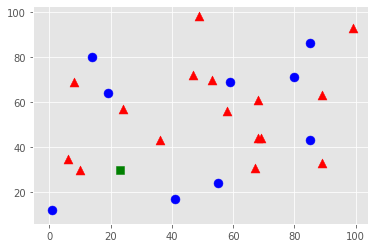

In [70]:
red = trainData[responses.ravel() == 0]
plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^')

blue = trainData[responses.ravel() == 1]
plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', 'o')

newcomer = np.random.randint(0, 100, (1,2)).astype(np.float32) # 가능하면 float 32로 해줘야 한다. 호환성 때문에! 꼭 기억!! ★★★
plt.scatter(newcomer[:, 0], newcomer[:,1], 80, 'g', 's')

In [25]:
import matplotlib
import matplotlib.pyplot as plt # pylab을 더이상 쓰지 말라고 공식사이트에서 말해주고 있다.

In [24]:
len(dir(matplotlib))

164

In [27]:
len(dir(plt))

251

2가지 모듈 내부의 개수가 다르다. 이런걸 몽키패치라고 한다. 잠수함패치, 게릴라패치라고 한다. 몰래 기능추가하는 거다. 게릴라 -> 고릴라 -> 몽키라고 이름이 바뀌었다.

pyplot은 다 매트랩의 유산이다. state machine이라고 박아놨다. 프로그래밍에서 변수할당 안하고, 그냥 plt하면 나와버린다. <br>
스테이츠 머신은 내 메모리상에 있는 가장 가까운 애를 택해서, 그래프를 그려준다. 주피터 노트북으로 치면, 한 셀에 있으면 그려주는 것이다. 그러면 현재 메모리 공간에 있는 것들을 다 그려주는 것이다. (한 메모리 셀) 그래서 스테이츠 머신 이해하는 게 중요하다.

Text(0.5, 1.0, 'aaa')

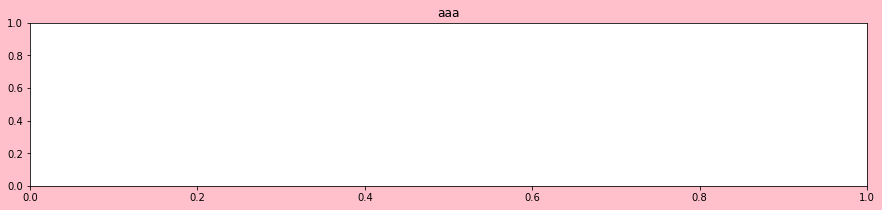

In [38]:
plt.figure(figsize = (15, 3), # 이걸 설정 안해주면, 자동으로 axes가 알아서 figure를 만들어준다.
          facecolor = 'pink') # 축 내부 테두리 색을 지정해준다.
plt.axes()
plt.title('aaa')

(4, 5)

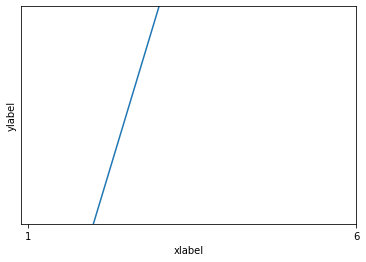

In [44]:
plt.plot([1, 2, 3], [3, 4, 5]) # 공대스타일이다. 
plt.xticks([1, 6]) # 축 범위 지정
plt.yticks([1, 6]) # 축 범위 지정
plt.xlabel('xlabel')
plt.ylabel('ylabel')

plt.ylim([4, 5]) # 값의 범위를 지정해줌. 이러면 tic이 필요없어지는 것이다.

In [45]:
plt.style.available # 태블로... 태블로는 속성 몇시간만에 가능하다고 한다.

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

Text(0, 0.5, 'ylabel')

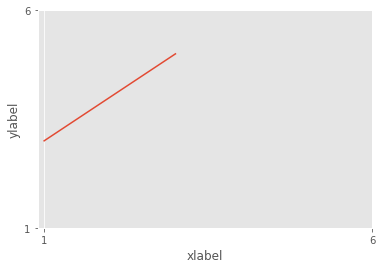

In [49]:
plt.style.use('ggplot') # d이런식으로 스타일을 지정할 수 있다.
plt.plot([1, 2, 3], [3, 4, 5]) # 공대스타일이다. 
plt.xticks([1, 6]) # 축 범위 지정
plt.yticks([1, 6]) # 축 범위 지정
plt.xlabel('xlabel')
plt.ylabel('ylabel')

Text(0.5, 1.0, '2')

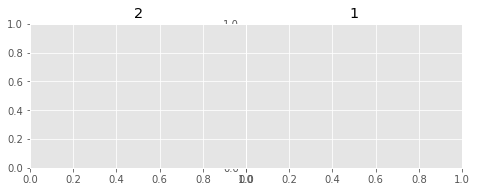

In [56]:
plt.axes([.5, 0, 0.5, .5]) # left bottom width height 순서로 되어있다.
plt.title('1') # 앞에 붙어버린다.

plt.axes([0, 0, .5, .5])
plt.title('2')

# 서브플롯

Text(0.5, 1.0, '1')

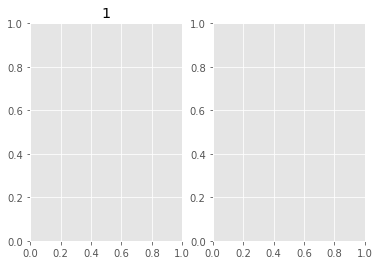

In [66]:
fig, ax = plt.subplots(1, 2)
ax[0].set_title('1') # 객체지향 방식으로 그릴 수 있다.

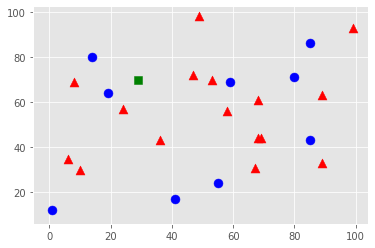

In [71]:
red = trainData[responses.ravel() == 0]
plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^')

blue = trainData[responses.ravel() == 1]
plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', 'o')

newcomer = np.random.randint(0, 100, (1,2)).astype(np.float32) # 가능하면 float 32로 해줘야 한다. 호환성 때문에! 꼭 기억!! ★★★
plt.scatter(newcomer[:, 0], newcomer[:,1], 80, 'g', 's')

knn은 계산복잡도가 크다. (데이터가 많아지면). 계산복잡도가 크면 사용하기가 함들다.

이제 구현해보자.

In [74]:
knn = cv2.ml.KNearest_create() # 스네이크 방식이다. 함수로 생각한다. 사이킷의 인스턴스와 비슷하다.
                               # 비어있는 모델 만드는 것이다. 사이킷에서는 하이퍼파라미터를 지정했다.
                               # vars로 확인할 수 있다.

In [77]:
knn.train(trainData, cv2.ml.ROW_SAMPLE, responses) # flags라는게 있는데 이걸 아는 방법은, 공식 문서에 가는 것이다.
                                                   # knn에서 로우 방식으로 저장되어 있으면, ROW SAMPLE로 하고, 아니면 COL SAMPLE

True

In [78]:
knn.train(trainData, 0, responses) # 0을 넣어도 무방하다. layout은 axis 개념이다.

True

In [76]:
dir(cv2.ml) # 대문자로 된건 죄다 상수이다.
cv2.ml.ROW_SAMPLE # 기계학습은 기본적으로 row 단위로 들어가지만, col 단위로도 들어갈 수 있다. (포트란은 col 방식이다)

0

In [79]:
knn.findNearest(newcomer, k=5) # 사이킷런보다 우아하다.

(0.0,
 array([[0.]], dtype=float32),
 array([[1., 0., 1., 0., 0.]], dtype=float32),
 array([[136., 194., 325., 328., 442.]], dtype=float32))

In [80]:
ret, result, neighbors, dist = knn.findNearest(newcomer, k=5) # 사이킷런보다 우아하다.

In [81]:
dist # distance

array([[136., 194., 325., 328., 442.]], dtype=float32)

In [82]:
neighbors # 근접한 5개 (k) 이웃들

array([[1., 0., 1., 0., 0.]], dtype=float32)

In [83]:
ret # return 값

0.0

근데 이런 방식은 3차원 학습시키기가 어렵다. 시킬 순 있는데, 귀찮다. 속도는 opencv가 조금 더 빠르다. 

# iris 데이터로 도전

In [87]:
from sklearn.datasets import load_iris

iris = load_iris()

In [109]:
inputs = iris.data.astype(np.float32)
labels = iris.target.astype(np.float32)

In [110]:
inputs

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [111]:
import cv2

knn = cv2.ml.KNearest_create()
knn.train(inputs, 0, labels)

True

In [115]:
new_data = np.array([[0, 1.1, 2.2, 3.3]]).astype(np.float32)

In [116]:
knn.findNearest(new_data, k=5)

(1.0,
 array([[1.]], dtype=float32),
 array([[0., 1., 1., 0., 1.]], dtype=float32),
 array([[31.5 , 32.2 , 32.79, 32.85, 32.94]], dtype=float32))

opencv의 기본값은 float32이기 때문에, 이거 넘어가는게 첫 번째 고비이다.

그리고 shape을 잘 맞춰줘야 하는데, [] 대괄호 한 번 더 new_data에 넣어줘야 한다.

# opencv knn 연습2

바로 시스템화 할 수 있기 때문에 opencv가 낫다. sklearn 보다...

In [198]:
import numpy as np
import cv2
import matplotlib.pyplot as plt #확인하는 용도

img = cv2.imread('C:/digits.png')

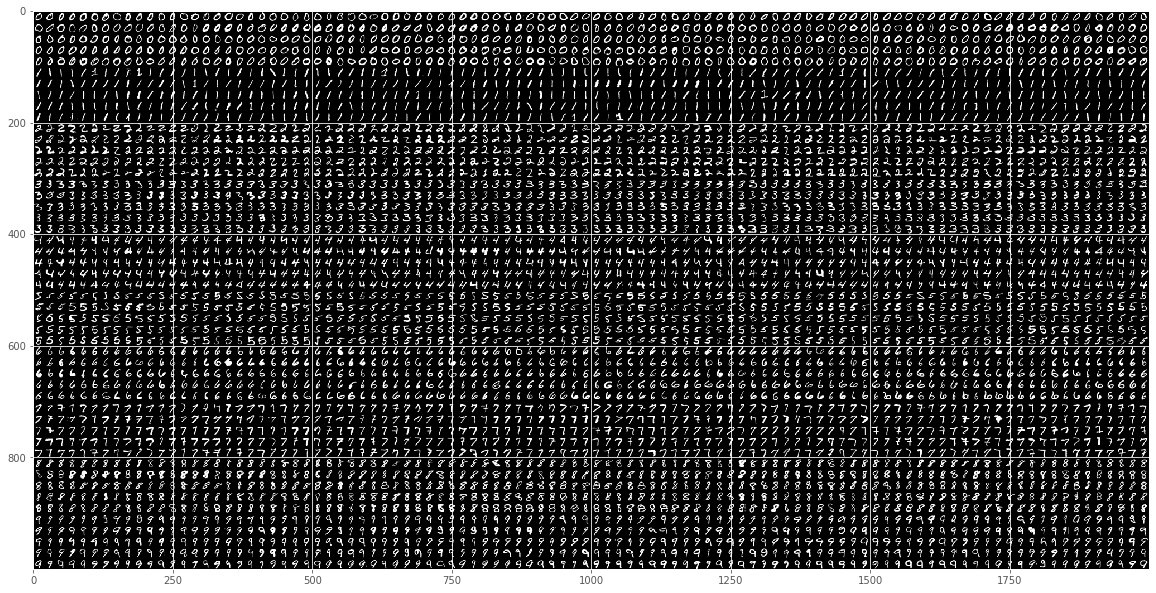

In [199]:
plt.figure(figsize = (20, 20))
plt.imshow(img);

이렇게 한 이미지에 다 박아 놨다. 이런 걸 자바스크립트에서 많이 쓴다. recast하는게 리소스가 많이 들어가기 때문에. 이미지 1개에 모든 데이터를 다 박아두는 것이다. 이걸 학습데이터로 바꿔야 한다. 전처리해야 한다.

우선은 컬러 컨버트를 해줘야 한다.

In [200]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1000, 2000)

In [201]:
cells = [np.hsplit(row,100) for row in np.vsplit(gray, 50)]

In [202]:
x = np.array(cells)

In [203]:
x.shape

(50, 100, 20, 20)

train/test 나눠줘서 하기

In [204]:
train = x[:, :50].reshape(-1, 400).astype(np.float32)
test = x[:, 50:].reshape(-1, 400).astype(np.float32)

k = np.arange(10)
train_labels = np.repeat(k, 250)[:, np.newaxis] # 차원 맞춰주기
test_labels = train_labels.copy()

In [205]:
train_labels.shape

(2500, 1)

In [206]:
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)

True

In [207]:
ret, result, neighbors, dist = knn.findNearest(test, k=5)

In [208]:
matches = result == test_labels
correct = np.count_nonzero(matches) # 들어있는 것 중에서, 0이 아닌 것들만 카운트 해준다.
accuracy = correct * 100.0/result.size

In [209]:
accuracy

91.76

In [217]:
result.shape

(2500, 1)

In [218]:
knn.calcError(result, test_labels)

TypeError: only size-1 arrays can be converted to Python scalars

# 이제 사이킷으로 해보자.

In [163]:
x = np.array(cells)

In [191]:
x = x.reshape(-1, 400)

In [187]:
y = np.repeat(np.arange(10), 500)[:, np.newaxis]

In [190]:
x.shape # 이거 되어야 하는데 안 된다.

(50, 100, 20, 20)

In [192]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_label, test_label = train_test_split(x, y, test_size=0.3, stratify = y)

In [193]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # K가 n_neibhbors 이다.
knn.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')>

In [194]:
knn.fit(train_input, train_label)
knn.score(test_input, test_label)

C:\Users\white\Anaconda3\envs\tf2.0-gpu\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


0.94

# SVM

In [219]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [222]:
dir(cv2.kmeans) # 이건 뭥미인가...

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__text_signature__']

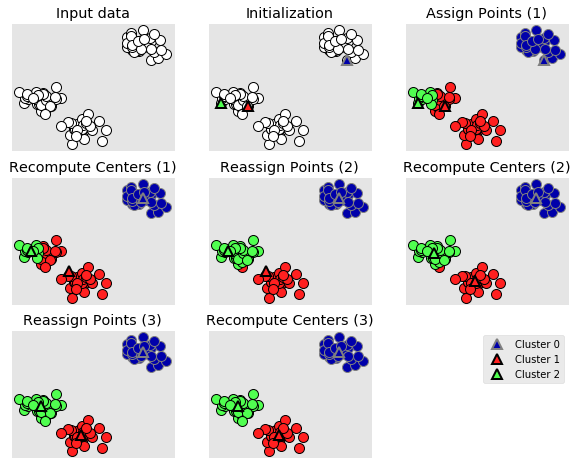

In [225]:
import mglearn

mglearn.plot_kmeans.plot_kmeans_algorithm() # EM 알고리즘이다. 버전 

In [227]:
x = np.random.randint(25, 100, 25)
y = np.random.randint(175, 255, 25)

z = np.hstack((x, y))
z = z.reshape((50,1)).astype(np.float32)

In [232]:
from sklearn.cluster import KMeans

kme = KMeans() # shift tab 하면 kmeans++이란게 있다.

In [234]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

flags = cv2.KMEANS_RANDOM_CENTERS

compactness, labels, centers = cv2.kmeans(z, 
                                          2,  # 클러스터
                                          None, 
                                          criteria, 
                                          10, # 10번 돌려라
                                          flags)

In [238]:
centers # 이 센터를 중심으로 라벨을 메겨준게 labels이다.

array([[ 58.44],
       [207.36]], dtype=float32)